## Creating ABIDE Visualizations


### Step 1: Import
Import the necessary libraries and the create a cleaned up version of the original ABIDE csv file. 

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd

import matplotlib.patches as mpatches

# location of partipcant csv files
dir = "/Users/chloehampson/Desktop/nbc/ABIDE/Hb_abide"
csv_dir = "/Users/chloehampson/Desktop/nbc/ABIDE/Hb_abide/csv_files"

# create a path for the newly created csv files
csv_file_path = op.join(csv_dir, "pheno_data.csv")

# dataframe for combined reduced ABIDE csv
abide_df = pd.read_csv(op.join(csv_dir, "abide.csv"))

# replace the -9999.0, '#', -9999 with no value
values_to_replace = [-9999.0, "#", "-9999"]
for value in values_to_replace:
    abide_df.replace(value, np.nan, inplace=True)


# Save the melted DataFrame to the CSV file
csv_file_path = op.join(csv_dir, "abide_data.csv")
abide_df.to_csv(csv_file_path, index=False)
print(abide_df)

      ABIDE  alternative_id_1  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX  \
0         1             50002         1        1.0        16.77    1   
1         1             50004         1        1.0        19.09    1   
2         1             50005         1        1.0        13.73    2   
3         1             50006         1        1.0        13.37    1   
4         1             50007         1        1.0        17.78    1   
...     ...               ...       ...        ...          ...  ...   
1381      2             50038         2        0.0        13.95    2   
1382      2             50047         2        0.0        15.35    1   
1383      2             50048         2        0.0        11.81    1   
1384      2             50050         2        0.0        14.37    1   
1385      2             50051         2        0.0        12.83    1   

      HANDEDNESS_CATEGORY COMORBIDITY  CURRENT_MED_STATUS  ADI_RRB_TOTAL_C  \
0                     3.0         NaN                 0.0

### Step 2: Dataframes and Plots
In this step, we modify the the ABIDE dataframe to have them in a format where we are able to create visualtions with the desired information.
#### 1. ASD and HC
We first must create a dataframe that will be used to compare our counts for ASD and HC


In [232]:
# create dataframe with relevant categories
ppt_df = abide_df[["ABIDE", "alternative_id_1", "HANDEDNESS_CATEGORY", "CURRENT_MED_STATUS", "DX_GROUP", "DSM_IV_TR", "AGE_AT_SCAN", "SEX", "ADI_R_RSRCH_RELIABLE", "ADOS_RSRCH_RELIABLE"]]

ppt_df["DX_GROUP"].replace({1: "ASD", 2: "HC"}, inplace=True)
ppt_df["SEX"].replace({1: "Male", 2: "Female"}, inplace=True)
ppt_df["CURRENT_MED_STATUS"].replace({0: "No Meds", 1: "Meds"}, inplace=True)
ppt_df["DSM_IV_TR"].replace(
    {
        0: "Control",
        1: "Autism",
        2: "Asperbergers",
        3: "PPD-NOS",
        4: "Aspergers or PDD-NOS",
    },
    inplace=True,
)
ppt_df["HANDEDNESS_CATEGORY"].replace(
    {
        1: "Right",
        2: "Left",
        3: "Mixed",

    },
    inplace=True,
)
ppt_df["AGE_AT_SCAN"] = pd.to_numeric(ppt_df["AGE_AT_SCAN"], errors="coerce")
print(ppt_df)

      ABIDE  alternative_id_1 HANDEDNESS_CATEGORY CURRENT_MED_STATUS DX_GROUP  \
0         1             50002               Mixed            No Meds      ASD   
1         1             50004               Right            No Meds      ASD   
2         1             50005               Right               Meds      ASD   
3         1             50006                Left            No Meds      ASD   
4         1             50007               Right            No Meds      ASD   
...     ...               ...                 ...                ...      ...   
1381      2             50038               Right            No Meds       HC   
1382      2             50047               Right            No Meds       HC   
1383      2             50048               Right            No Meds       HC   
1384      2             50050                Left            No Meds       HC   
1385      2             50051               Right            No Meds       HC   

     DSM_IV_TR  AGE_AT_SCAN

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/2281063255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppt_df["DX_GROUP"].replace({1: "ASD", 2: "HC"}, inplace=True)
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/2281063255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppt_df["SEX"].replace({1: "Male", 2: "Female"}, inplace=True)
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/2281063255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

This code creates a countplot to see total counts of ASD and HC.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


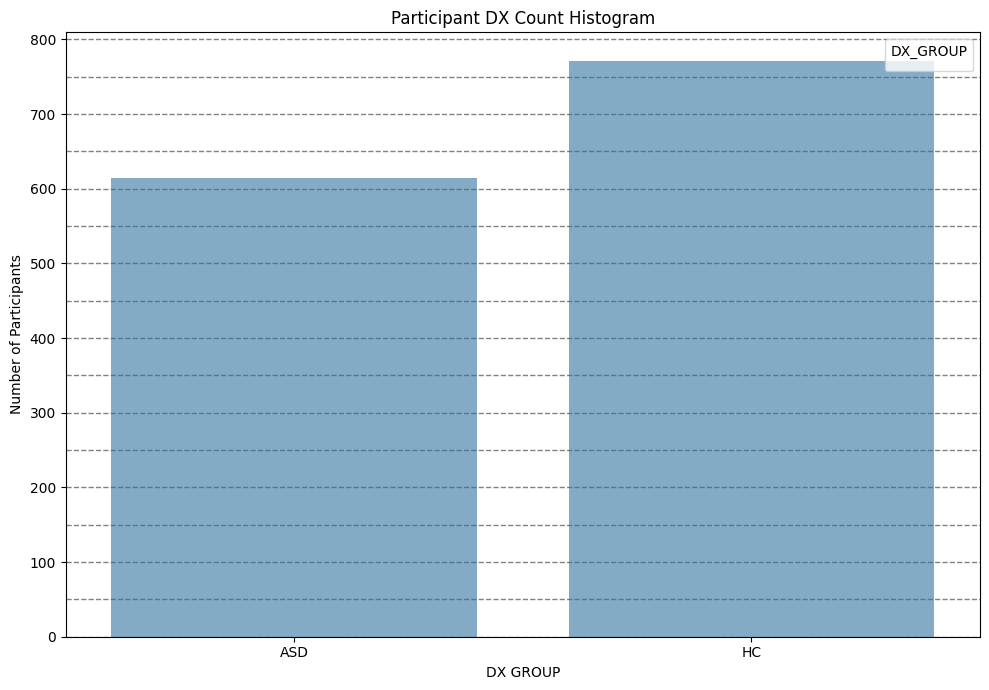

In [233]:
fig, bx = plt.subplots(figsize=(10, 7))
sns.countplot(
    data=ppt_df, x="DX_GROUP", stat="count", width=0.8, alpha=0.6, ax=bx, zorder=2
)
bx.set_xlabel("DX GROUP")
bx.set_ylabel("Number of Participants")
bx.set_title("Participant DX Count Histogram")
bx.legend(title="DX_GROUP", loc="upper right")
for line_count in range(0, 801, 50):
    bx.axhline(line_count, color="gray", linestyle="--", linewidth=1.0, zorder=1)

plt.tight_layout()
plt.show()

This code creates a scatterplot to show the distribution of ASD to HC. 

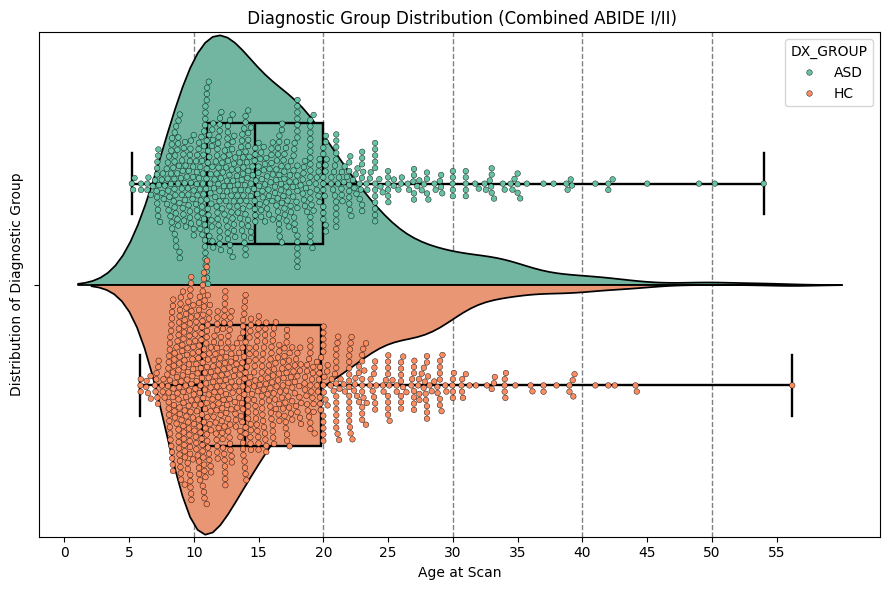

In [234]:
fig, ax = plt.subplots(figsize=(9, 6))

# sns.stripplot(data=ppt_df, x="AGE_AT_SCAN", hue="DX_GROUP", palette="Set2", orient='h', jitter = 0.1, dodge = 'True', size=4, edgecolor = "black",
#  linewidth = 0.3, ax = ax, zorder=4)
sns.swarmplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    dodge=1.2,  # Adjust this value as needed
    size=4,
    edgecolor="black",
    linewidth=0.3,
    ax=ax,
    zorder=4
)
sns.boxplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    hue="DX_GROUP",
    palette="Set2",
    dodge=True,
    gap=.4,
    whis=(0, 100),
    orient="h",
    linecolor="black",
    linewidth=1.7,
    width=.8,
    ax=ax,
    zorder=3,
)
sns.violinplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    split=True,
    inner=None,
    alpha=1,
    width=.99,
    linecolor="black",
    ax=ax,
    zorder=2,
)

# Create a custom legend for the diagnostic group
handles, labels = ax.get_legend_handles_labels()
custom_legend = ax.legend(handles[0:2], labels[0:2], title="DX_GROUP", loc="upper right")


ax.set_xlabel("Age at Scan")
ax.set_ylabel("Distribution of Diagnostic Group")
ax.set_title(" Diagnostic Group Distribution (Combined ABIDE I/II)")

ax.set_xticks(range(0, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 5))
for age in range(10, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 10):
    ax.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)
plt.tight_layout()
plt.show()

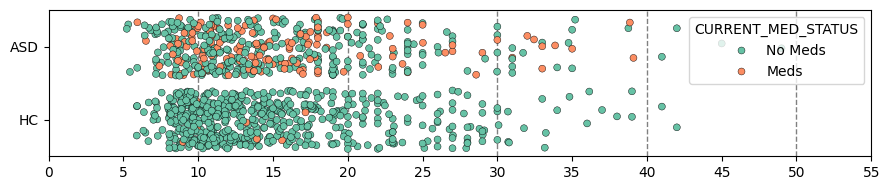

In [235]:
fig, ax = plt.subplots(figsize=(9, 2))

sns.stripplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    y="DX_GROUP",
    hue="CURRENT_MED_STATUS",
    palette="Set2",
    edgecolor="black",
    jitter=0.4,  # Adjust the jitter value as needed
    linewidth=0.3,
    ax=ax,
    zorder=4
)

# Create a custom legend for the diagnostic group
handles, labels = ax.get_legend_handles_labels()
custom_legend = ax.legend(handles[0:2], labels[0:2], title="DX_GROUP", loc="upper right")

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")
ax.legend(title="CURRENT_MED_STATUS", loc="upper right")

ax.set_xticks(range(0, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 5))
for age in range(10, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 10):
    ax.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)

plt.tight_layout()
plt.show()



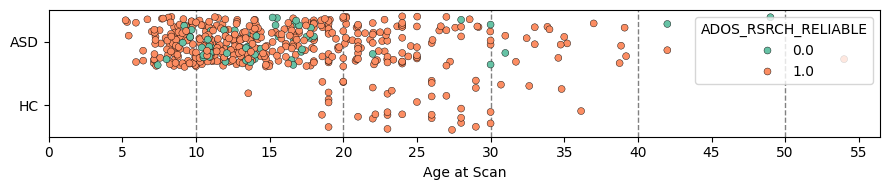

In [244]:
fig, ax = plt.subplots(figsize=(9, 2))

sns.stripplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    y="DX_GROUP",
    hue="ADOS_RSRCH_RELIABLE",
    palette="Set2",
    edgecolor="black",
    jitter=0.4,  # Adjust the jitter value as needed
    linewidth=0.3,
    ax=ax,
    zorder=4
)

# Create a custom legend for the diagnostic group
handles, labels = ax.get_legend_handles_labels()
custom_legend = ax.legend(handles[0:2], labels[0:2], title="DX_GROUP", loc="upper right")

ax.set_xlabel("Age at Scan")
ax.set_ylabel("")
ax.set_title("")
ax.legend(title="ADOS_RSRCH_RELIABLE", loc="upper right")

ax.set_xticks(range(0, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 5))
for age in range(10, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 10):
    ax.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)

plt.tight_layout()
plt.show()

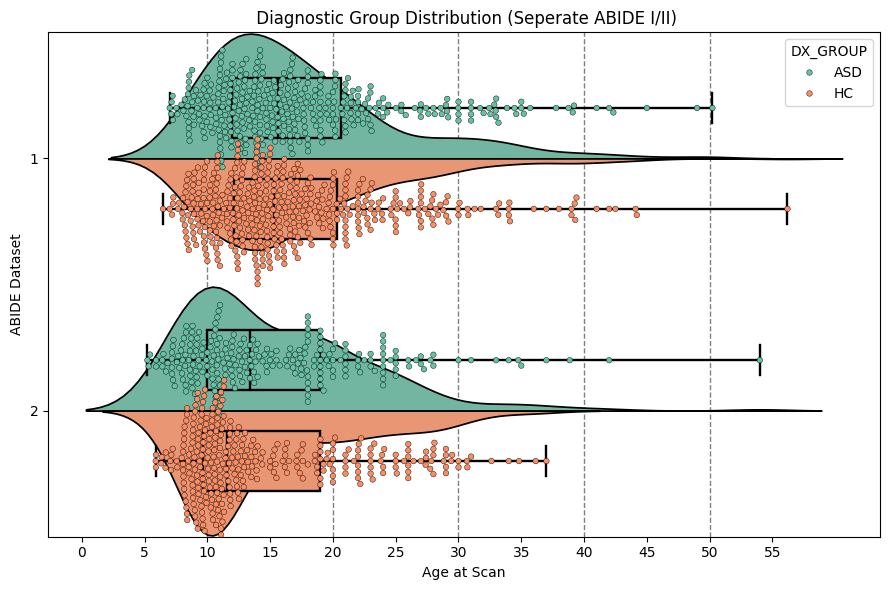

In [237]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.swarmplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    y="ABIDE",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    dodge=1.2,  # Adjust this value as needed
    size=4,
    edgecolor="black",
    linewidth=0.3,
    ax=ax,
    zorder=4
)
sns.violinplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    y="ABIDE",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    split=True,
    inner=None,
    alpha=1,
    width=.99,
    linecolor="black",
    ax=ax,
    zorder=2,
)
sns.boxplot(
    data=ppt_df,
    x="AGE_AT_SCAN",
    y="ABIDE",
    hue="DX_GROUP",
    palette="Set2",
    dodge=True,
    gap=.4,
    whis=(0, 100),
    orient="h",
    linecolor="black",
    linewidth=1.7,
    width=.8,
    ax=ax,
    zorder=3,
)

# Create a custom legend for the diagnostic group
handles, labels = ax.get_legend_handles_labels()
custom_legend = ax.legend(handles[0:2], labels[0:2], title="DX_GROUP", loc="upper right")

ax.set_xlabel("Age at Scan")
ax.set_ylabel("ABIDE Dataset")
ax.set_title(" Diagnostic Group Distribution (Seperate ABIDE I/II)")

ax.set_xticks(range(0, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 5))
for age in range(10, int(ppt_df["AGE_AT_SCAN"].max()) + 1, 10):
    ax.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)
plt.tight_layout()
plt.show()

This plot factors in sex

This plot is the same plot and factors in dsm-5 categories

#### 2. Phenotypic Dataframe
We must first create a dataframe that will be used to analyze our phenotypic counts.

In [238]:
# create a temporary df of relevant information
temp_pheno_df = abide_df[
    [
        "alternative_id_1",
        "DX_GROUP",
        "DSM_IV_TR",
        "AGE_AT_SCAN",
        "SEX",
        "ADI_RRB_TOTAL_C",
        "ADI_R_SOCIAL_TOTAL_A",
        "ADI_R_VERBAL_TOTAL_BV",
        "ADOS_GOTHAM_SOCAFFECT",
        "ADOS_GOTHAM_RRB",
        "SRS_MOTIVATION",
        "VINELAND_DAILYLVNG_STANDARD",
        "VINELAND_COPING_V_SCALED",
    ]
]
print(temp_pheno_df)

# Select the last 6 columns and melt them into a 'phenotype' column
pheno_df = temp_pheno_df.melt(
    id_vars=["alternative_id_1", "DX_GROUP", "DSM_IV_TR", "AGE_AT_SCAN", "SEX"],
    value_vars=[
        "ADI_RRB_TOTAL_C",
        "ADI_R_SOCIAL_TOTAL_A",
        "ADI_R_VERBAL_TOTAL_BV",
        "ADOS_GOTHAM_SOCAFFECT",
        "ADOS_GOTHAM_RRB",
        "SRS_MOTIVATION",
        "VINELAND_DAILYLVNG_STANDARD",
        "VINELAND_COPING_V_SCALED",
    ],
    var_name="Phenotype",
    value_name="value",
)

# Remove NaN values from the 'value' column
pheno_df = pheno_df.dropna(subset=["value"])
pheno_df = pheno_df[pheno_df["AGE_AT_SCAN"] != "#"]
pheno_df["AGE_AT_SCAN"] = pd.to_numeric(pheno_df["AGE_AT_SCAN"], errors="coerce")

pheno_df["DX_GROUP"].replace({1: "ASD", 2: "HC"}, inplace=True)
pheno_df["DSM_IV_TR"].replace(
    {
        0: "Control",
        1: "Autism",
        2: "Asperbergers",
        3: "PPD-NOS",
        4: "Aspergers or PDD-NOS",
    },
    inplace=True,
)
print(pheno_df)

# Save the melted DataFrame to the CSV file
csv_file_path = op.join(csv_dir, "pheno_data.csv")
pheno_df.to_csv(csv_file_path, index=False)

      alternative_id_1  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX  \
0                50002         1        1.0        16.77    1   
1                50004         1        1.0        19.09    1   
2                50005         1        1.0        13.73    2   
3                50006         1        1.0        13.37    1   
4                50007         1        1.0        17.78    1   
...                ...       ...        ...          ...  ...   
1381             50038         2        0.0        13.95    2   
1382             50047         2        0.0        15.35    1   
1383             50048         2        0.0        11.81    1   
1384             50050         2        0.0        14.37    1   
1385             50051         2        0.0        12.83    1   

      ADI_RRB_TOTAL_C  ADI_R_SOCIAL_TOTAL_A  ADI_R_VERBAL_TOTAL_BV  \
0                 5.0                  16.0                    9.0   
1                 5.0                  19.0                   12.0   
2        

This code creates a countplot for the phenotypes with dsm 5 totals. 

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/3780429044.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ex.set_xticklabels(ex.get_xticklabels(), rotation=45, horizontalalignment="right")


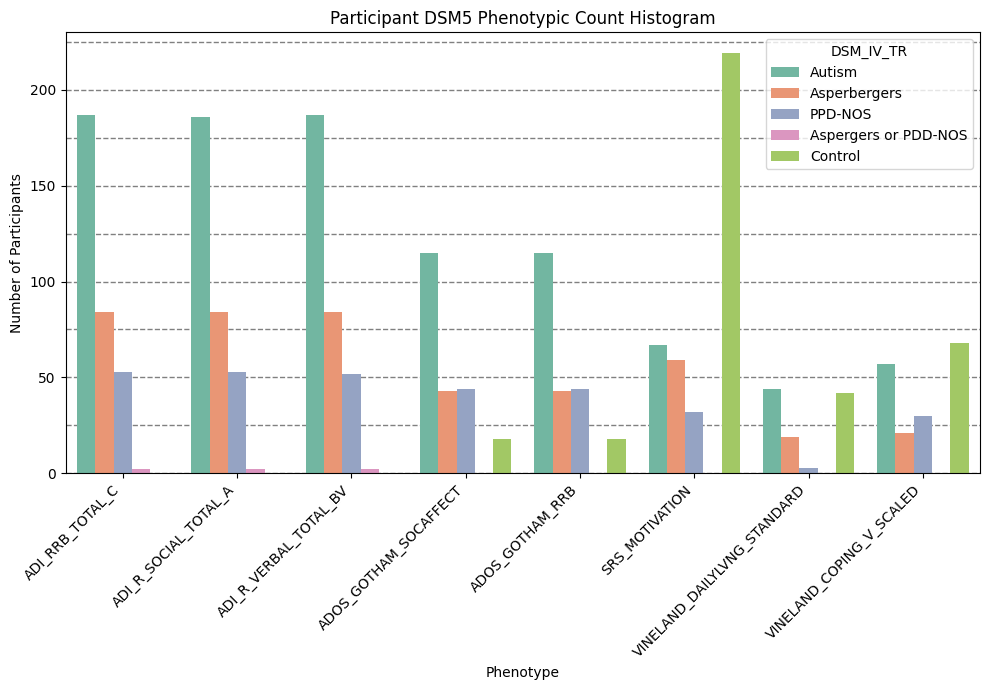

In [239]:
fig, ex = plt.subplots(figsize=(10, 7))
sns.countplot(
    data=pheno_df,
    x="Phenotype",
    hue="DSM_IV_TR",
    stat="count",
    palette="Set2",
    width=0.8,
    ax=ex,
    zorder=2,
)
ex.set_xlabel("Phenotype")
ex.set_ylabel("Number of Participants")
ex.set_title("Participant DSM5 Phenotypic Count Histogram")
ex.legend(title="DSM_IV_TR", loc="upper right")
ex.set_xticklabels(ex.get_xticklabels(), rotation=45, horizontalalignment="right")
for line_count in range(0, 226, 25):
    ex.axhline(line_count, color="gray", linestyle="--", linewidth=1.0, zorder=1)
    value_counts = pheno_df["Phenotype"].value_counts()
    value_counts = pheno_df.groupby("Phenotype")["Phenotype"].count()
plt.tight_layout()

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/3294222976.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ex.set_xticklabels(ex.get_xticklabels(), rotation=45, horizontalalignment="right")


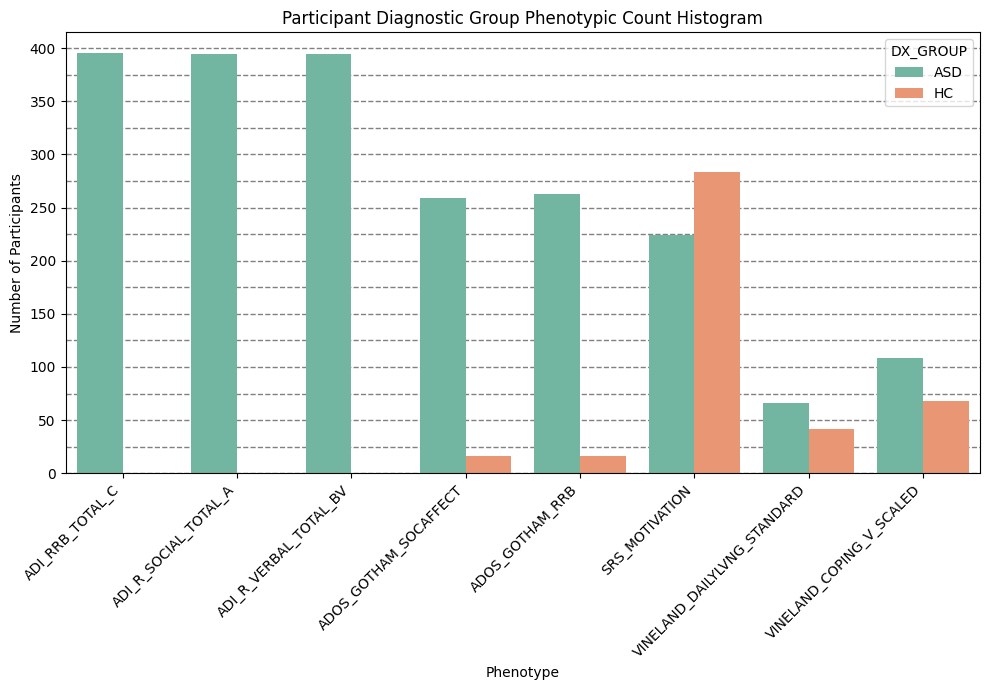

In [240]:
fig, ex = plt.subplots(figsize=(10, 7))
sns.countplot(
    data=pheno_df,
    x="Phenotype",
    hue="DX_GROUP",
    stat="count",
    palette="Set2",
    width=0.8,
    ax=ex,
    zorder=2,
)
ex.set_xlabel("Phenotype")
ex.set_ylabel("Number of Participants")
ex.set_title("Participant Diagnostic Group Phenotypic Count Histogram")
ex.legend(title="DX_GROUP", loc="upper right")
ex.set_xticklabels(ex.get_xticklabels(), rotation=45, horizontalalignment="right")
for line_count in range(0, 401, 25):
    ex.axhline(line_count, color="gray", linestyle="--", linewidth=1.0, zorder=1)
    value_counts = pheno_df["Phenotype"].value_counts()
    value_counts = pheno_df.groupby("Phenotype")["Phenotype"].count()
plt.tight_layout()

This code creates a raincloudplot of the phenotypic age distribution for diagnostic category.

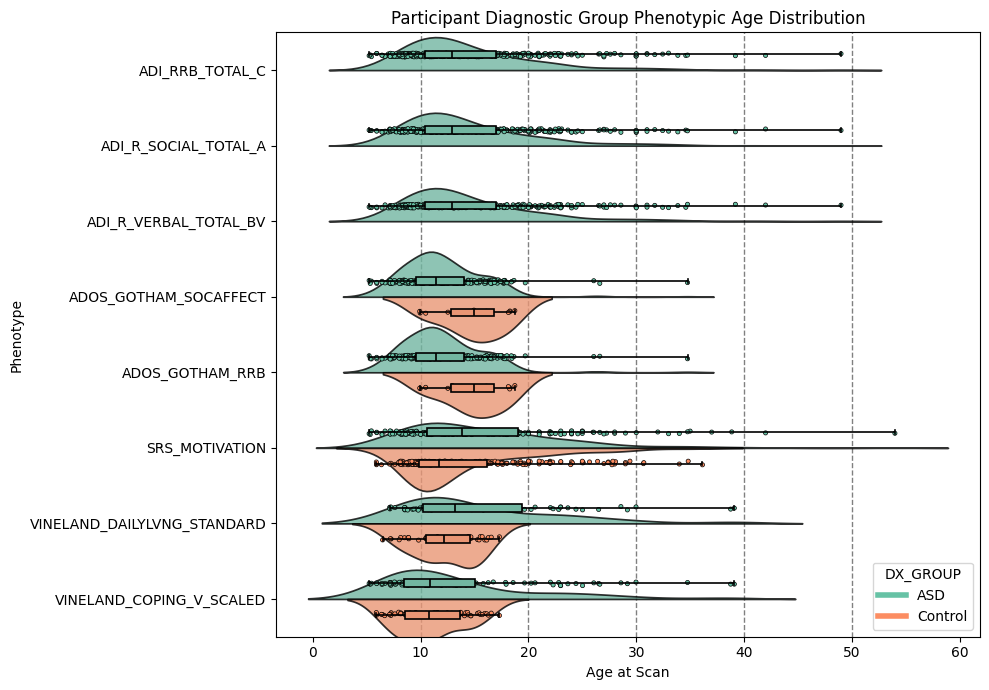

In [241]:
fig, cx = plt.subplots(figsize=(10, 7))
sns.stripplot(
    data=pheno_df,
    x="AGE_AT_SCAN",
    y="Phenotype",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    jitter=0.05,
    dodge=True,
    size=3,
    edgecolor="black",
    linewidth=0.5,
    ax=cx,
    zorder=3,
)
sns.boxplot(
    data=pheno_df,
    x="AGE_AT_SCAN",
    y="Phenotype",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    whis=(0, 100),
    width=0.83,
    gap=0.75,
    linecolor="black",
    linewidth=1.2,
    ax=cx,
    zorder=4,
)
sns.violinplot(
    data=pheno_df,
    x="AGE_AT_SCAN",
    y="Phenotype",
    hue="DX_GROUP",
    palette="Set2",
    orient="h",
    split=True,
    inner=None,
    alpha=0.8,
    width=1.2,
    linecolor="black",
    ax=cx,
    zorder=2,
)

cx.set_xlabel("Age at Scan")
cx.set_ylabel("Phenotype")
cx.set_title("Participant Diagnostic Group Phenotypic Age Distribution")
legend_labels = ["ASD", "Control"]
legend_handles = [
    plt.Line2D([0], [0], color=sns.color_palette("Set2")[0], lw=4),
    plt.Line2D([0], [0], color=sns.color_palette("Set2")[1], lw=4),
]
cx.legend(legend_handles, legend_labels, title="DX_GROUP", loc="lower right")
for age in range(10, int(pheno_df["AGE_AT_SCAN"].max()) + 1, 10):
    cx.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)
plt.tight_layout()

This code creates a scatterplot with a boxplot for the phenotypic age with dsm5.

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_14028/2730743613.py:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


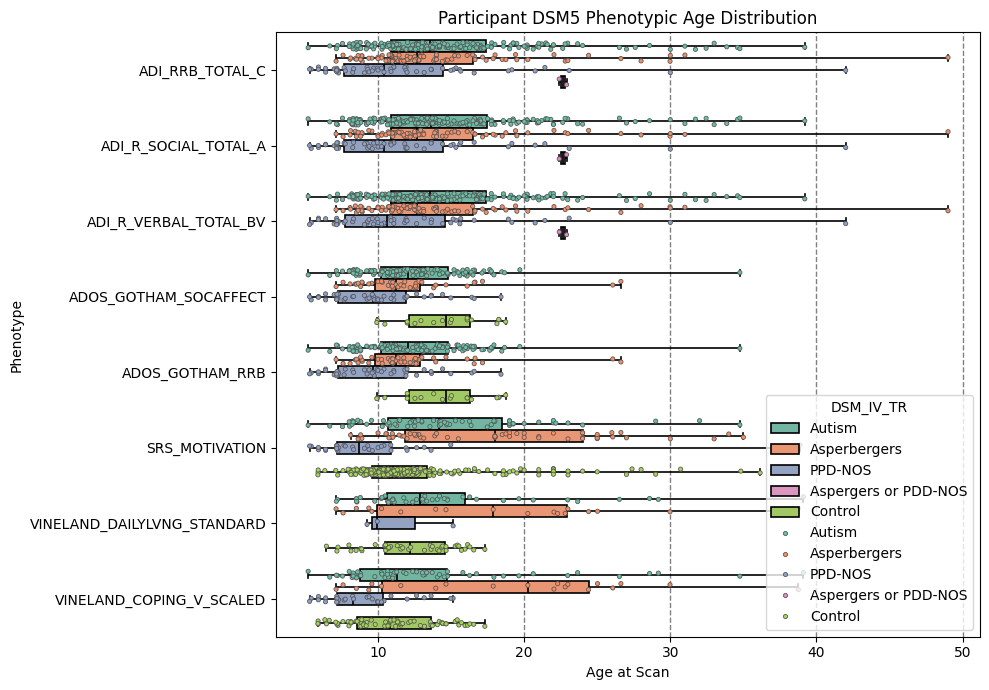

In [242]:
fig, dx = plt.subplots(figsize=(10, 7))
sns.boxplot(
    data=pheno_df,
    x="AGE_AT_SCAN",
    y="Phenotype",
    hue="DSM_IV_TR",
    palette="Set2",
    orient="h",
    whis=(0, 100),
    flierprops=dict(markersize=3),
    linecolor="black",
    linewidth=1.2,
    ax=dx,
    zorder=2,
)
sns.stripplot(
    data=pheno_df,
    x="AGE_AT_SCAN",
    y="Phenotype",
    hue="DSM_IV_TR",
    palette="Set2",
    orient="h",
    jitter=0.23,
    dodge=True,
    size=3,
    edgecolor="gray",
    linewidth=0.6,
    ax=dx,
    zorder=3,
)
dx.set_xlabel("Age at Scan")
dx.set_ylabel("Phenotype")
dx.set_title("Participant DSM5 Phenotypic Age Distribution")
dx.legend(title="DSM_IV_TR", loc="lower right")
for age in range(10, int(pheno_df["AGE_AT_SCAN"].max()) + 1, 10):
    dx.axvline(x=age, color="gray", linestyle="--", linewidth=1.0, zorder=1)
plt.tight_layout()